<a href="https://colab.research.google.com/github/ryeowook6021/algorithm/blob/master/%E9%99%B3%E5%93%81%E8%93%81_109%E6%BC%94%E7%AE%97%E6%B3%95%E6%9C%9F%E6%9C%AB%E8%80%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**109演算法期末考**

*   每題25分共125分
*   1/13 23:59前完成不扣分;
*   11/14 11:59前減5分;11/14 23:59前減10分；1/15 11:59前減15分;
*   最遲需於1/15 11:59前繳交!
*   請在解題想法區塊寫上解題的想法/思路、所使用的演算法及其原因(最好有推導過程)
*   程式碼需可以執行，且依照題目說明的輸入輸出規範
*   檔名改成 XXX_109演算法期末考.ipynb







第一題：
請從一個整數Array中，找出第K大的元素

Exp：輸入: {5,3,8,2,9,4,6} 
          K=2
    輸出: Ans:8


解題想法：使用插入排序法




先將輸入的數字做排序，之後再挑第x位大的數，

但因為只要第k大的數，可以不用把所有數都按照大小排好位置。

每次只排前x個大的數，後面沒排到的數要跟前x個數做比較，

若後面的數比較大的話要插入進陣列中，否則就不需要加入。

全部的數字都比完的時候，這個陣列裡面最小的數，就是我們要的，第k大的數。

[1]


時間複雜度 (n-k)logk


[1]https://blog.csdn.net/Strive_0902/article/details/82940456

In [ ]:
#程式
def Find_number_kthmax(array,k):
    for a in range(1,k):
        for b in range(a,0,-1):
            if array[b] > array[b-1]:
                array[b],array[b-1] = array[b-1],array[b]
            else:
                pass
    for c in range(k,len(array)):
        if array[c] > array[k-1]:
            array[k-1] = array[c]
            for d in range(k-1,0,-1):
                if array[d] > array[d-1]:
                    array[d],array[d-1] = array[d-1],array[d]
                else:
                    pass
    return array[k-1]

print("輸入7個數字")
A=[]
for i in range(7):
  A.append(int(input()))
print("想要知道第x大的是誰")
d=int(input())
print("答案是")
print(Find_number_kthmax(A,d)) 

輸入7個數字
5
6
2
3
5
4
8
想要知道第x大的是誰
5
答案是
4


第二題： 找零錢問題
目前有 1,2,5,10 四種面值的硬幣，請算出有總共有幾種方式湊N元?


Exp：輸入N=32，輸出：各種湊出32元的組合



解題想法：用動態規劃

用1元、2元、5、10元湊32元
先建一個串列DP[i]表示湊i元最少需要幾個硬幣

從coins裡面幣值最小的開始選，由小選到大

要先輸入湊多少錢，還有幾個銅板
DP的大小設(錢幣種類數量+1)*(欲湊金額數量+1)

初始值先設DP[0]=0，

因為湊0元需要0個硬幣，
其它的DP[i]就先設成無限大


初始值設DP[i][0] = 1; 假設0元是一種方法(不出錢)


不使用第i種錢，共DP[i-1][j]種可能
在「第i種錢的幣值<=j的狀況下可以用第i種錢」，共DP[i][j-第i種錢的幣值]種可能[1]


可以找出DP[i]為湊i元有幾組解
[1]https://ithelp.ithome.com.tw/articles/10231659
程式[2]https://leetcode.com/problems/coin-change/



In [ ]:
def change2(amount,coins) -> int:
  dp = [0] * (amount + 1)        
  dp[0] = 1
        
  for denom in coins:
    for a in range(denom, amount+1):
      dp[a] += dp[a-denom]
                
  return dp[-1]
print("要湊成多少錢")
amount=int(input())
print("輸入內容")
coins=[]
for i in range(4):
  coins.append(int(input()))
print("有幾種方法")
print(change2(amount,coins))

要湊成多少錢
32
輸入內容
1
2
5
10
有幾種方法
114


第三題： 有個小偷到3C用品店偷東⻄,假設他的背包的負重最多可達10公斤,他希望在背包中裝入負重範圍內可得之總價物品,小偷的背包應該怎麼裝才能帶走最有價值的商品?

* 每個商品只有拿走/留著這兩種狀況
* 每個商品不能被切割（如拿1/3個）
* 每個商品也不能被拿超過一次
* 請輸出所選擇的產品之編號，單價，總價，背包總重量


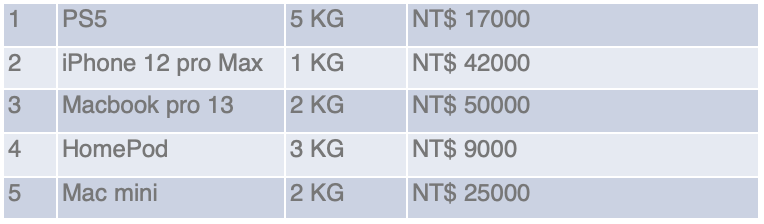








解題想法：使用貪婪法

可供選擇的屬性有兩種：價值，重量


1、取價值最高者放入背包；

要偷東西就要先偷價值最高的

2、計算背包的剩餘空間；
現在的重量要跟可以容納的重量去比較，如果背包放得下就拿第二高價值的，如果放不下就換下一個可放入且價值高的，直到整個背包誰都放不下為止。[1]
[1]https://medium.com/@chiahunglin/%E6%88%91%E7%9A%84dsa%E6%97%A5%E8%A8%98-7-e15613948c91

In [ ]:
#程式
values=[17000,42000,50000,9000,25000]
weights=[5,1,2,3,2]
numbers=5
maxweight =10
product=["ps5","iphone 12pro max","macbopk pro 13","homepod","mac mini"]
arr = [(i,product[i],values[i]/weights[i],weights[i], values[i]) for i in range(len(weights))]
arr.sort(key=lambda x:x[2], reverse=True)

nowbagValues = 0
baglist = []  #先建立空的串列
nowbagvalues=[] #先建立空的串列
totalweight=0
for b,product,w,weights,values in arr:
    if totalweight <= maxweight:
        totalweight=totalweight+weights
        if totalweight <= maxweight:
          nowbagValues += values    #如果現在包包裝的東西比所需重量還要小的話就可以加進去
          nowbagvalues.append(values)
          baglist.append(product)
          
        else:
          totalweight=totalweight-weights
       
print('偷走總價值:',nowbagValues,'偷的東西有:',baglist,'偷的東西單價：',bagvalues,'總重量：',totalweight)

偷走總價值: 134000 偷的東西有: ['iphone 12pro max', 'macbopk pro 13', 'mac mini', 'ps5'] 偷的東西單價： [42000, 50000, 25000, 17000] 總重量： 10


第四題：請以深度優先搜尋(DFS)、廣度優先搜尋法(BFS)走訪有向圖中的所有節點，並印出兩種搜尋法的走訪順序

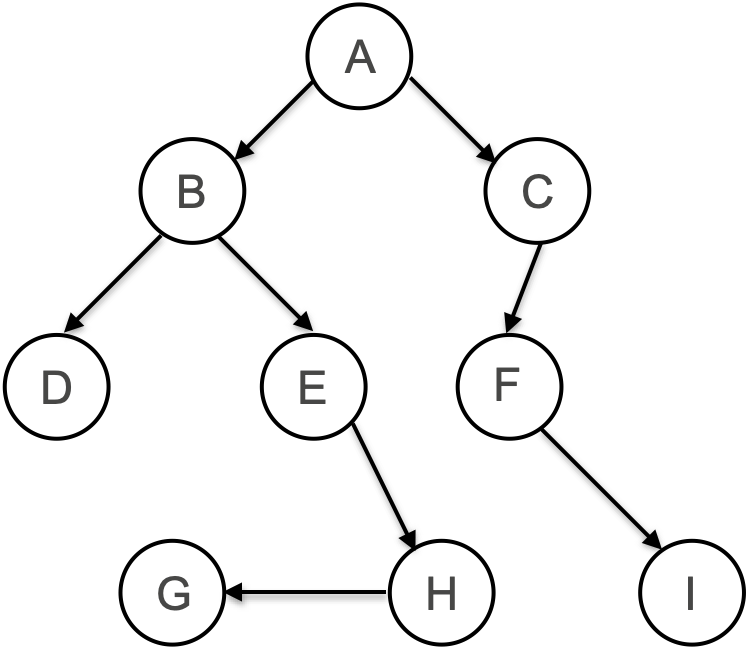

解題想法：

廣度優先
從結點開始，要把同層的節點都去過才能往下一層走，如果所有節點都走過了，才停止

1.照順序一層一層下去，樹畫出來

2.走過別再走[1]


深度優先演算法
要把一邊走到最底才能走到樹的分支，就是節點所在邊都己被走過，回到搜尋節點那條邊的起始位置。
>一次走到底，到底再回頭看哪裡沒走過

1.每一層走一點和一遍最好

2.到底層爬回去上層找沒走過的[2]

我的題目圖

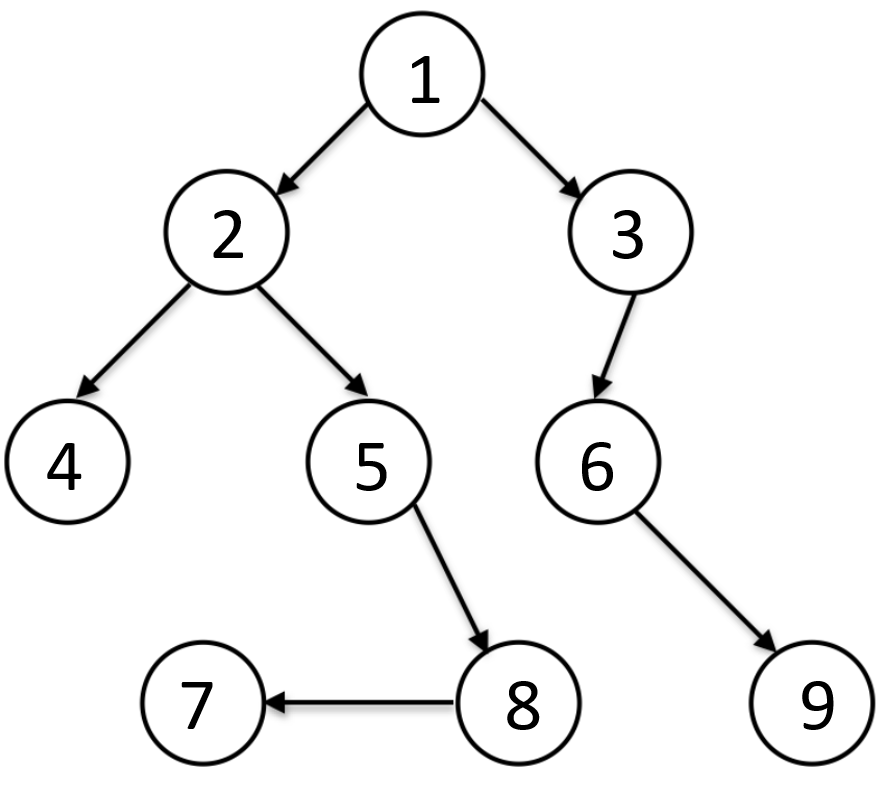
[1]https://iter01.com/562672.html
[2]https://f74461036.pixnet.net/blog/post/352335176

In [ ]:
#程式
def enqueue(a, o):
    a.insert(0, o)

def dequeue(a):
    return a.pop()

g = { #  graph: 被搜尋的網路
    '1': {'n':['2','3'], 'v':0}, #  n: neighbor (鄰居), v: visited (是否被訪問過)
    '2': {'n':['4','5'], 'v':0},
    '3': {'n':['6'], 'v':0},
    '4': {'n':[], 'v':0},
    '5': {'n':['8'], 'v':0},
    '6': {'n':['9'], 'v':0},
    '7': {'n':[], 'v':0},
    '8': {'n':['7'], 'v':0},
    '9': {'n':[], 'v':0},
}

def init(g): #  初始化、設定 visited 為 0
    for i in g:
        g[i]['v'] = 0

def dfs(g, node): #  深度優先搜尋
    if g[node]['v']!=0:           #  如果已訪問過，就不再訪問
        return
    print(node, '=> ', end = '')  #  否則、印出節點
    g[node]['v'] = 1              #    並設定為已訪問
    neighbors = g[node]['n']      # 取出鄰居節點
    for n in neighbors:           #  對於每個鄰居
        dfs(g, n)                 #    逐一進行訪問

queue=['1'] #  BFS 用的 queue, 起始點為 1。

def bfs(g, q): #  廣度優先搜尋
    if len(q)==0:                 #  如果 queue 已空，則返回。
        return
    node = dequeue(q)             #  否則、取出 queue 的第一個節點。
    if g[node]['v'] == 0:         #  如果該節點尚未拜訪過。
        g[node]['v'] = 1          #    標示為已拜訪
    else:                         #  否則 (已訪問過)
        return                    #    不繼續搜尋，直接返回。
    print(node, '=> ', end = '')  #  印出節點
    neighbors = g[node]['n']      #  取出鄰居。
    for n in neighbors: #  對於每個鄰居
        if not g[n]['v']:         #  假如該鄰居還沒被拜訪過
            enqueue(q, n)         #    就放入 queue 中
    bfs(g, q)

print('dfs:', end = '')
init(g)
dfs(g, '1') # 呼叫深度優先搜尋。
print("深度優先搜尋結束")
print('')

print('bfs:', end = '')
init(g)
bfs(g, queue) # 呼叫廣度優先搜尋。
print("廣度優先搜尋結束")
print('')




dfs:1 => 2 => 4 => 5 => 8 => 7 => 3 => 6 => 9 => 深度優先搜尋結束

bfs:1 => 2 => 3 => 4 => 5 => 6 => 8 => 9 => 7 => 廣度優先搜尋結束



第五題： 請用 Kruskal或Prim 演算法(2選1)找出下圖的最小生成樹，並依照順序寫出加入的每一個邊

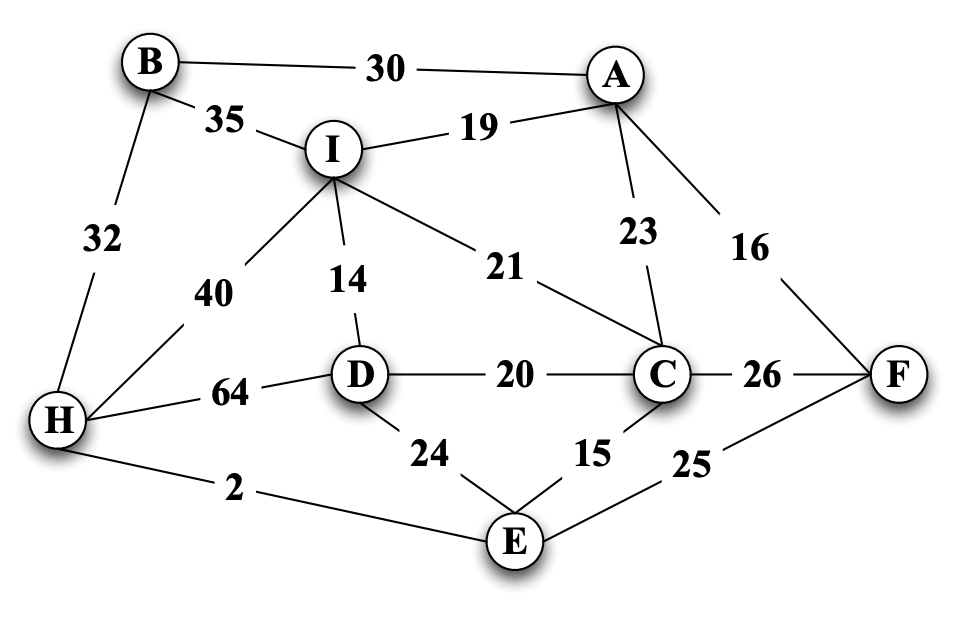

解題想法:

使用克魯斯克爾的方法


生成樹中的所有節點，兩兩之間有權重值，依照權重的大小依序選取，每次都要選擇最小的那個邊，但是選取的邊都不能成為一個封閉的路，直到所有頂點都走過。[2]


所以第一次要走最短邊2>EH邊


第二次走14>DI邊


第三次走15>CE邊


第四次16>AF邊


第五次19>AI邊


第六次20>CD邊


第七次30>AB邊


自己畫的圖

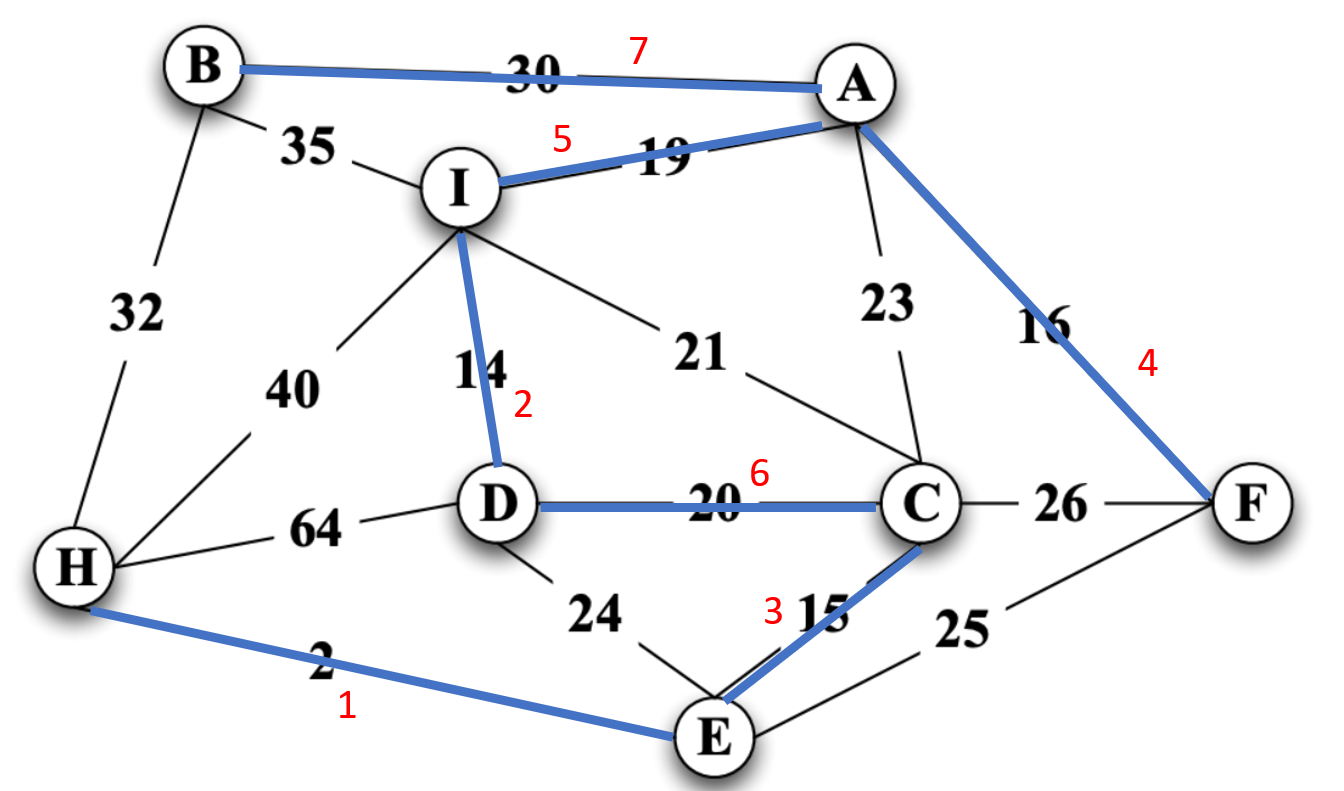

[1]https://www.itread01.com/content/1549051928.html
[2]https://www.itread01.com/content/1546538976.html

In [ ]:
#程式
class DisjointSet(dict):
    '''不相交集'''
    def __init__(self, dict):
        pass

    def add(self, item):
        self[item] = item

    def find(self, item):
        if self[item] != item:
            self[item] = self.find(self[item])
        return self[item]

    def unionset(self, item1, item2):
        self[item2] = self[item1]


def Kruskalway(nodes, edges):
    '''基於不相交集實現Kruskal演算法'''
    forest = DisjointSet(nodes)
    me = []
    for item in nodes:
        print(item)
        forest.add(item)
    edges = sorted(edges, key=lambda element: element[2])
    num_sides = len(nodes)-1  # 最小生成樹的邊數等於頂點數減一
    for e in edges:
        node1, node2, _ = e
        parent1 = forest.find(node1)
        parent2 = forest.find(node2)
        if parent1 != parent2:
            me.append(e)
            num_sides -= 1
            if num_sides == 0:
                return me
            else:
                forest.unionset(parent1, parent2)
    pass


def Kruskal(nodes, edges):
    all_nodes = nodes  # set(nodes)
    used_nodes = set()
    me = []
    edges = sorted(edges, key=lambda element: element[2], reverse=True)
    # 對所有的邊按權重升序排列
    while used_nodes != all_nodes and edges:
        element = edges.pop(-1)
        if element[0] in used_nodes and element[1] in used_nodes:
            continue
        me.append(element)
        used_nodes.update(element[:2])
        # print(used_nodes)
    return me


def main():
    nodes = set(list('ABCDEFHI'))
    edges = [("A", "B", 30),("A", "C", 23),
         ("A", "F", 16),("A", "I", 19), 
         ("B", "H", 32), ("B", "I", 35),
         ("C", "I", 21), ("C", "F", 26),
         ("C", "D", 20), ("C", "E", 15),
         ("D", "I", 14), ("D", "E", 24),
         ("D", "H", 64), ("E", "F", 25),
         ("E", "H", 2),]
    print("\n\nThe minimum spanning tree by Kruskal is : ")
    print(Kruskalway(nodes, edges))

main()



The minimum spanning tree by Kruskal is : 
F
D
H
E
A
I
B
C
[('E', 'H', 2), ('D', 'I', 14), ('C', 'E', 15), ('A', 'F', 16), ('A', 'I', 19), ('C', 'D', 20), ('A', 'B', 30)]
